In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
data=pd.read_csv('winequality-red.csv')
data


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [7]:
data.isna().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1:]


In [9]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2)
print('Training Data shape')
print()
print('Training data-x-shape:\t',xtrain.shape)
print()
print('Training data-y-shape:\t',ytrain.shape)
print()
print('Testing data shape')
print()
print('Testing data(x-input)shape:\t',xtest.shape)
print()
print('Testing data(y-outcome)shape:\t',ytest.shape)


Training Data shape

Training data-x-shape:	 (1279, 11)

Training data-y-shape:	 (1279, 1)

Testing data shape

Testing data(x-input)shape:	 (320, 11)

Testing data(y-outcome)shape:	 (320, 1)


In [10]:
xtrain.shape

(1279, 11)

In [11]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

log_reg=LogisticRegression(solver='liblinear',verbose=2)
print('Training model\n')
log_reg.fit(xtrain,ytrain)

ypred=log_reg.predict(xtest)
print('Predicted label for the input samples:\n',ypred)
print()
print('Testing is completed\n')
print('Testing samples are:\t',len(ypred))

print('Accuracy score:\t\n',accuracy_score(ytest,ypred))
print()
print('confusion matrix:\n',confusion_matrix(ytest,ypred))
print()
print('classification report:\n',classification_report(ytest,ypred))


Training model

[LibLinear]Predicted label for the input samples:
 [6 6 5 5 5 6 5 5 5 6 6 6 5 6 5 6 6 6 6 6 6 5 5 6 5 6 5 6 6 5 5 6 5 7 6 5 6
 6 6 5 5 5 6 5 5 6 6 6 6 5 5 5 5 6 5 5 6 5 5 6 5 5 6 5 6 6 6 6 6 6 5 5 6 5
 5 6 6 6 6 5 5 6 6 5 6 6 5 5 5 6 6 5 5 6 5 6 5 5 5 5 6 5 5 5 6 6 5 5 5 6 6
 5 5 5 6 6 5 6 6 6 5 6 6 5 6 5 7 6 6 5 6 5 6 6 6 5 6 6 5 6 6 6 6 6 5 5 6 5
 6 6 5 6 6 5 6 6 6 5 5 6 5 5 5 5 6 7 6 6 5 5 6 6 7 6 6 6 5 6 5 6 5 6 5 6 6
 5 5 5 6 6 5 6 5 5 5 6 5 5 5 6 5 5 5 5 5 5 6 6 6 5 7 5 5 5 7 6 6 6 6 6 5 6
 5 6 5 6 5 6 5 5 6 5 5 5 6 5 5 6 5 5 6 5 5 6 5 7 5 6 5 6 5 5 5 5 6 6 5 5 6
 6 6 5 5 5 6 6 5 5 5 6 5 6 5 6 5 5 5 5 6 5 6 6 6 6 6 5 5 6 6 7 6 6 5 5 6 5
 6 5 5 5 6 5 6 5 6 5 6 5 5 6 5 5 6 5 5 5 5 5 5 5]

Testing is completed

Testing samples are:	 320
Accuracy score:	
 0.596875

confusion matrix:
 [[ 0  0  1  0  0  0]
 [ 0  0  6  3  0  0]
 [ 0  0 97 23  2  0]
 [ 0  0 55 91  1  0]
 [ 0  0  3 30  3  0]
 [ 0  0  0  3  2  0]]

classification report:
               precision    recall  

C:\Users\my pc\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\my pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\my pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\my pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarni

# Feature Scaling

In [12]:
x.head(3)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8


In [13]:
from sklearn.preprocessing import StandardScaler
std_sc=StandardScaler()
sc_x=std_sc.fit_transform(x)


In [14]:
sc_x


array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [15]:
log_reg.get_params()


{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 2,
 'warm_start': False}

In [16]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

log_reg=LogisticRegression(solver='liblinear',verbose=2)
print('Training model\n')
log_reg.fit(xtrain,ytrain)

ypred=log_reg.predict(xtest)
print('Predicted label for the input samples:\n',ypred)
print()
print('Testing is completed\n')
print('Testing samples are:\t',len(ypred))

print('Accuracy score:\t\n',accuracy_score(ytest,ypred))
print()
print('confusion matrix:\n',confusion_matrix(ytest,ypred))
print()
print('classification report:\n',classification_report(ytest,ypred))


Training model

[LibLinear]Predicted label for the input samples:
 [6 6 5 5 5 6 5 5 5 6 6 6 5 6 5 6 6 6 6 6 6 5 5 6 5 6 5 6 6 5 5 6 5 7 6 5 6
 6 6 5 5 5 6 5 5 6 6 6 6 5 5 5 5 6 5 5 6 5 5 6 5 5 6 5 6 6 6 6 6 6 5 5 6 5
 5 6 6 6 6 5 5 6 6 5 6 6 5 5 5 6 6 5 5 6 5 6 5 5 5 5 6 5 5 5 6 6 5 5 5 6 6
 5 5 5 6 6 5 6 6 6 5 6 6 5 6 5 7 6 6 5 6 5 6 6 6 5 6 6 5 6 6 6 6 6 5 5 6 5
 6 6 5 6 6 5 6 6 6 5 5 6 5 5 5 5 6 7 6 6 5 5 6 6 7 6 6 6 5 6 5 6 5 6 5 6 6
 5 5 5 6 6 5 6 5 5 5 6 5 5 5 6 5 5 5 5 5 5 6 6 6 5 7 5 5 5 7 6 6 6 6 6 5 6
 5 6 5 6 5 6 5 5 6 5 5 5 6 5 5 6 5 5 6 5 5 6 5 7 5 6 5 6 5 5 5 5 6 6 5 5 6
 6 6 5 5 5 6 6 5 5 5 6 5 6 5 6 5 5 5 5 6 5 6 6 6 6 6 5 5 6 6 7 6 6 5 5 6 5
 6 5 5 5 6 5 6 5 6 5 6 5 5 6 5 5 6 5 5 5 5 5 5 5]

Testing is completed

Testing samples are:	 320
Accuracy score:	
 0.596875

confusion matrix:
 [[ 0  0  1  0  0  0]
 [ 0  0  6  3  0  0]
 [ 0  0 97 23  2  0]
 [ 0  0 55 91  1  0]
 [ 0  0  3 30  3  0]
 [ 0  0  0  3  2  0]]

classification report:
               precision    recall  

C:\Users\my pc\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\my pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\my pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\my pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarni

# Handling Imbalancing data

In [17]:
data=pd.read_csv('Churn_Modelling.csv')

In [18]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1:]


In [19]:
data.isna().sum()



RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [20]:
data=data.fillna(method='bfill')
data.isna().sum()


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [21]:
data.head(1)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.0,1,1,1,101348.88,1


<Axes: xlabel='Exited', ylabel='count'>

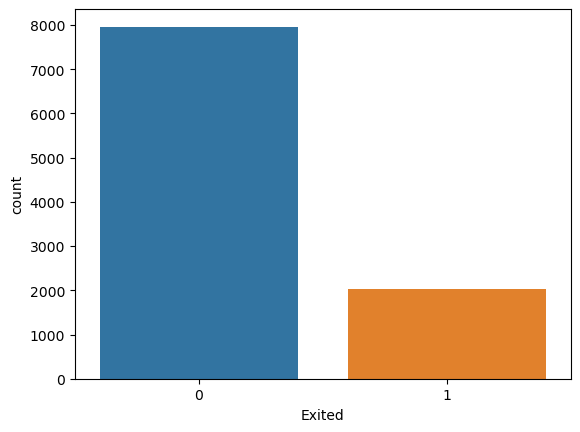

In [22]:
sns.countplot(x=data['Exited'])

Majority length:	 7963

Minority length:	 2037

(15963, 14)


<Axes: xlabel='Exited', ylabel='count'>

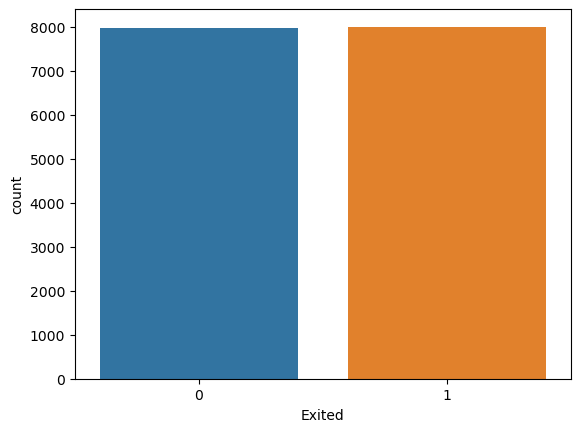

In [23]:
from sklearn.utils import resample

df_majority=data[data.Exited==0]
df_minority=data[data.Exited==1]

print('Majority length:\t',len(df_majority))
print()
print('Minority length:\t',len(df_minority))
print()

df_minority_upsampled=resample(df_minority,
                              replace=True,
                              n_samples=8000,
                              random_state=12
                              )
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

print(df_upsampled.shape)
sns.countplot(data=df_upsampled, x='Exited')


In [24]:
df_upsampled.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0


In [25]:
df_upsampled.shape


(15963, 14)

In [26]:
x=df_upsampled.iloc[:,:-1]
y=df_upsampled.iloc[:,-1:]



xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2)
print('Training Data shape')
print()
print('Training data-x-shape:\t',xtrain.shape)
print()
print('Training data-y-shape:\t',ytrain.shape)
print()
print('Testing data shape')
print()
print('Testing data(x-input)shape:\t',xtest.shape)
print()
print('Testing data(y-outcome)shape:\t',ytest.shape)


Training Data shape

Training data-x-shape:	 (12770, 13)

Training data-y-shape:	 (12770, 1)

Testing data shape

Testing data(x-input)shape:	 (3193, 13)

Testing data(y-outcome)shape:	 (3193, 1)


Majority length:	 7963

Minority length:	 2037

(15963, 14)


<Axes: xlabel='Exited', ylabel='count'>

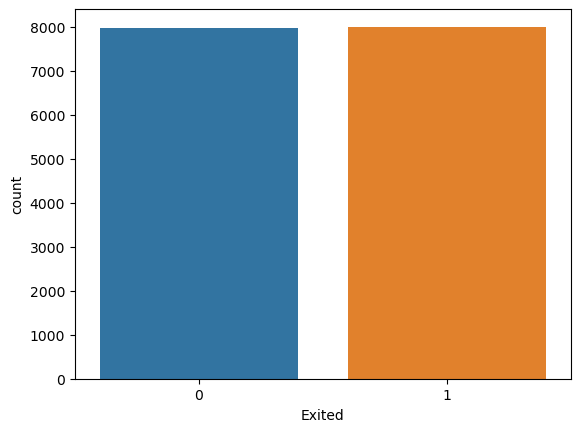

In [60]:
from sklearn.utils import resample

df_majority=data[data.Exited==0]
df_minority=data[data.Exited==1]

print('Majority length:\t',len(df_majority))
print()
print('Minority length:\t',len(df_minority))
print()

df_minority_downsampled=resample(df_minority,
                              replace=True,
                              n_samples=8000,
                              random_state=12
                              )
df_downsampled = pd.concat([df_majority, df_minority_downsampled])

print(df_downsampled.shape)
sns.countplot(data=df_downsampled, x='Exited')


In [27]:
x=df_downsampled.iloc[:,:-1]
y=df_downsampled.iloc[:,-1:]



xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2)
print('Training Data shape')
print()
print('Training data-x-shape:\t',xtrain.shape)
print()
print('Training data-y-shape:\t',ytrain.shape)
print()
print('Testing data shape')
print()
print('Testing data(x-input)shape:\t',xtest.shape)
print()
print('Testing data(y-outcome)shape:\t',ytest.shape)


NameError: name 'df_downsampled' is not defined

# LDA(Linear Discriminant Analysis)


In [28]:
data=pd.read_csv('winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [29]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [30]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1:]

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=0)

In [33]:
x_train.shape

(1279, 11)

In [34]:
x_test.shape

(320, 11)

In [35]:
y_test.shape

(320, 1)

In [36]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(x_train, y_train)

C:\Users\my pc\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
y_pred_lda=lda.predict(x_test)
y_pred_lda

array([6, 5, 7, 5, 6, 5, 5, 6, 5, 5, 5, 5, 6, 4, 6, 6, 7, 6, 6, 5, 7, 5,
       6, 7, 5, 5, 5, 6, 5, 7, 6, 6, 6, 5, 6, 6, 5, 6, 7, 6, 5, 6, 8, 7,
       6, 5, 5, 6, 5, 6, 5, 5, 6, 6, 6, 5, 5, 5, 7, 5, 5, 6, 6, 6, 5, 6,
       5, 6, 7, 6, 5, 5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 5, 6, 6, 6, 5, 7, 5,
       5, 5, 5, 5, 6, 5, 6, 5, 6, 5, 5, 6, 7, 6, 6, 6, 6, 5, 6, 5, 6, 5,
       6, 5, 6, 5, 6, 6, 6, 7, 6, 6, 5, 6, 5, 5, 8, 7, 5, 5, 6, 7, 5, 5,
       6, 6, 7, 5, 6, 5, 6, 5, 6, 5, 5, 5, 6, 6, 6, 7, 6, 5, 6, 6, 5, 6,
       6, 6, 5, 5, 6, 6, 6, 6, 6, 5, 6, 5, 6, 7, 5, 6, 6, 5, 5, 7, 6, 6,
       6, 7, 6, 5, 5, 7, 5, 6, 7, 5, 6, 6, 5, 6, 6, 6, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 6, 5, 5, 5, 5, 5, 7, 6, 5, 6, 5, 5, 7, 5, 6, 6, 6, 6, 5,
       5, 6, 7, 6, 5, 6, 7, 6, 5, 5, 5, 6, 5, 6, 6, 6, 6, 7, 7, 6, 5, 5,
       5, 5, 6, 5, 5, 5, 5, 7, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 7, 5, 6,
       5, 5, 5, 5, 6, 7, 6, 6, 5, 6, 6, 6, 7, 5, 7, 7, 5, 7, 6, 6, 6, 5,
       5, 5, 6, 6, 6, 4, 6, 5, 5, 6, 5, 5, 5, 5, 6,

# PCA(Principal Component Analysis)


In [38]:

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(x_train)

In [39]:
y_pred_pca=lda.predict(x_test)
y_pred_pca

array([6, 5, 7, 5, 6, 5, 5, 6, 5, 5, 5, 5, 6, 4, 6, 6, 7, 6, 6, 5, 7, 5,
       6, 7, 5, 5, 5, 6, 5, 7, 6, 6, 6, 5, 6, 6, 5, 6, 7, 6, 5, 6, 8, 7,
       6, 5, 5, 6, 5, 6, 5, 5, 6, 6, 6, 5, 5, 5, 7, 5, 5, 6, 6, 6, 5, 6,
       5, 6, 7, 6, 5, 5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 5, 6, 6, 6, 5, 7, 5,
       5, 5, 5, 5, 6, 5, 6, 5, 6, 5, 5, 6, 7, 6, 6, 6, 6, 5, 6, 5, 6, 5,
       6, 5, 6, 5, 6, 6, 6, 7, 6, 6, 5, 6, 5, 5, 8, 7, 5, 5, 6, 7, 5, 5,
       6, 6, 7, 5, 6, 5, 6, 5, 6, 5, 5, 5, 6, 6, 6, 7, 6, 5, 6, 6, 5, 6,
       6, 6, 5, 5, 6, 6, 6, 6, 6, 5, 6, 5, 6, 7, 5, 6, 6, 5, 5, 7, 6, 6,
       6, 7, 6, 5, 5, 7, 5, 6, 7, 5, 6, 6, 5, 6, 6, 6, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 6, 5, 5, 5, 5, 5, 7, 6, 5, 6, 5, 5, 7, 5, 6, 6, 6, 6, 5,
       5, 6, 7, 6, 5, 6, 7, 6, 5, 5, 5, 6, 5, 6, 6, 6, 6, 7, 7, 6, 5, 5,
       5, 5, 6, 5, 5, 5, 5, 7, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 7, 5, 6,
       5, 5, 5, 5, 6, 7, 6, 6, 5, 6, 6, 6, 7, 5, 7, 7, 5, 7, 6, 6, 6, 5,
       5, 5, 6, 6, 6, 4, 6, 5, 5, 6, 5, 5, 5, 5, 6,

# Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)
rf.fit(x_train,y_train)

C:\Users\my pc\AppData\Local\Temp\ipykernel_16212\466989199.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


RandomForestClassifier(random_state=0)

In [42]:
y_pred_res=rf.predict(x_test)
y_pred_res

array([5, 5, 7, 5, 5, 6, 5, 6, 5, 5, 5, 5, 6, 6, 5, 7, 7, 5, 5, 5, 6, 5,
       6, 6, 5, 5, 5, 7, 5, 6, 6, 6, 6, 5, 7, 7, 5, 6, 6, 6, 5, 6, 6, 7,
       6, 5, 5, 6, 5, 6, 5, 5, 6, 6, 6, 5, 5, 5, 7, 5, 5, 6, 6, 6, 5, 6,
       5, 5, 7, 6, 5, 5, 5, 5, 6, 6, 5, 5, 5, 7, 6, 5, 6, 6, 6, 5, 6, 5,
       5, 5, 5, 6, 6, 5, 7, 5, 6, 5, 5, 6, 7, 6, 6, 6, 5, 5, 5, 5, 6, 5,
       6, 5, 8, 5, 6, 6, 6, 7, 6, 6, 5, 6, 5, 5, 6, 7, 5, 5, 6, 6, 5, 5,
       6, 6, 6, 5, 6, 5, 6, 5, 6, 5, 5, 6, 5, 6, 8, 6, 5, 5, 6, 5, 5, 5,
       6, 6, 6, 6, 6, 6, 6, 6, 7, 5, 5, 5, 6, 6, 6, 6, 6, 6, 5, 7, 6, 6,
       5, 7, 7, 5, 5, 7, 6, 6, 7, 5, 6, 6, 5, 5, 6, 5, 5, 6, 5, 5, 5, 5,
       5, 5, 5, 6, 6, 6, 5, 5, 5, 6, 7, 6, 6, 6, 5, 7, 5, 6, 6, 6, 6, 5,
       5, 6, 6, 5, 6, 6, 6, 6, 6, 6, 5, 6, 5, 5, 6, 6, 6, 7, 7, 6, 5, 6,
       5, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 5, 5, 7, 6, 6, 5, 6,
       5, 5, 5, 5, 6, 6, 5, 5, 5, 5, 6, 6, 7, 6, 6, 7, 5, 7, 5, 5, 6, 5,
       5, 5, 7, 6, 5, 5, 6, 6, 5, 6, 6, 5, 5, 5, 6,

# GridSearchCV

In [43]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)

grid_search.fit(x_train, y_train)

C:\Users\my pc\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [None, 10], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]})

# RandomizedSearchCV

In [44]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(50, 150),  
    'max_depth': [None, 10, 20],
    'min_samples_split': randint(2, 10),  
    'min_samples_leaf': randint(1, 4) 
}

random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1)

random_search.fit(x_train, y_train)

print("Best Hyperparameters:", random_search.best_params_)

C:\Users\my pc\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 113}


# Cross Validation


In [46]:
cv_scores = cross_val_score(rf, x_train, y_train, cv=5, n_jobs=-1)

# Model Evaluation


In [47]:
from sklearn.metrics import accuracy_score
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

In [48]:
print("LDA transformed data shape:", X_train_lda.shape)
print("PCA transformed data shape:", X_train_pca.shape)
print("Grid Search Best Parameters:", grid_search.best_params_)
print("Randomized Search Best Parameters:", random_search.best_params_)
print("Cross-Validation Scores:", cv_scores)
print("Accuracy on Test Set:", accuracy)

LDA transformed data shape: (1279, 5)
PCA transformed data shape: (1279, 2)
Grid Search Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Randomized Search Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 113}
Cross-Validation Scores: [0.640625   0.62890625 0.671875   0.6640625  0.6745098 ]
Accuracy on Test Set: 0.71875
